# Business Problem Statement

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru. As a result, this projects consists of predicting the house prices in Bengaluru, India using a dataset of more than 10000 records.

# Data Preprocessing

The interesting thing of this project is that the data is really dirty and has many outliers. So it needs a lot of feature engineering to prepare for a machine learning model. I made the following changes :

- Based on domain knowledge I removed columns which are not relevant for prediction.
- Removed the missing values in columns where the percentage of missing values was very small while in other columns I labeled them with the string 'Missing'.
- Categorical features with only few different categories are encoded using one-hot encoding technique while for features with huge amount of categories are considered only the top 20 most frequent categories. The other ones are labeled with 'other' are then one-hot encoding is applied to encode them into numerical features.
- Some features like number of bedrooms have object datatype so I converted them into float numbers.

- Outlier Removal : Based on business logic I removed all houses where nr of bathrooms is greater than 2 + nr of bedroom.

- Since one of the ML estimators I trained is Linear Regression I handled multicolleniarity by dropping independent features (redundant features) that are highly correlated with each other.
- Feature scaling using StandardScaler is performed since Linear Regression works well when the features are scaled.

- Feature Selection and Feature Scaling is performed together with the hyperparameter tuning using sklearn pipelines in order to avoid data leakage (overfitting).

# Model Building and Tuning

- The ML Estimators I trained are : Linear Regression, Decision Tree and Random Forest.
- I evaluated each ML model using training score, cross validation mean score, cross validation scores, test score to get a better understanding about the model performances. The best model is selected using the test score.

In [1]:
## Importing Necessary library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

## Reading the data from the csv file

In [3]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.columns.nunique()

9

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


## Visualizing the data

<AxesSubplot:>

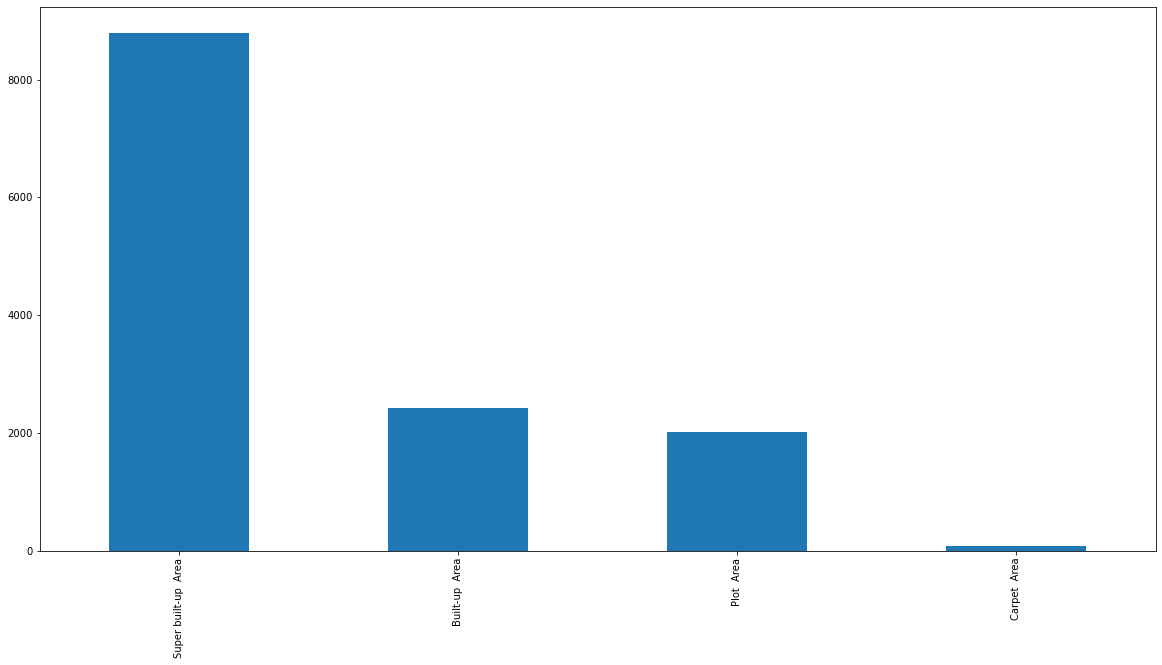

In [13]:
df.area_type.value_counts().plot(kind='bar')

Now removing the un necessary data in the datasets

In [14]:
df2 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df2.shape

(13320, 5)

In [16]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

## Now for the data cleaning process
 ### Removing the null values

In [17]:
df3 = df2.dropna()

In [18]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df3.shape

(13246, 5)

##  Featuring Process

In [20]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [21]:
## here if we look at the size column there are BHK and bedroom which are totally diferent values
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
## so from the above results in the size columns there are two different methods of showing the total numbner of beds
## Making the new column

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\He336\AppData\Local\Temp\ipykernel_2532\2835883509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [23]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [25]:
## Here we can see that one of the house has the 43 bedrooms which is hard to believe so let's check it
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
## think  that's error because 43 bedrooms with the total_sqft of 2400 seems not good so let's check the total_sqft
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Extracting Only Float Val or Only String Val
## Function to extract only float value, other values will be replaced as NaNs.

In [27]:
## here from the avove result we see some value in range i.e. 1133 - 1384
## For this type of value we have to perform the operation to take the average value by 1133 + 1384 / 2

def float_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
df3[df3['total_sqft'].apply(float_num)].head(8) ### Here it returns the true vlues in the float_num

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4


In [30]:
df3[~df3['total_sqft'].apply(float_num)].head(8) ### Here it returns all the false values present in thje foloat_num functionm

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9


In [31]:
## now writing the function that handles the 900-69 values as well other values like 34.46Sq. Meter
def convert_to_float(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0]) + float(values[1]))/2
    try:
        return float(x)
    except:
        return None
    
        

In [32]:
convert_to_float('2100')

2100.0

In [33]:
convert_to_float('10 - 10')
## outputting the average of two

10.0

In [34]:
(10 + 10) / 2
## Like this

10.0

In [35]:
convert_to_float('34.46Sq. Meter')
## Here the results is none according to function

In [36]:
df3.head(3)
## Here is our original data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [37]:
## Now applying the function we wrote
## First lets make the copy good pracice

df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_to_float)
df4.head(3)

## Here from the result we can see that the value in the total_sqft number is changed into float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [38]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [39]:
df4 = df4[df4.total_sqft.notnull()]


In [40]:
df4.shape

(13200, 6)

In [41]:
## Checking whether the function works properly or not
df4.loc[122] ## eans the value of 122 index

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [42]:
(3067 + 8156) /2
## It matches

5611.5

In [43]:
df4.shape ## Here we are just ignoring the (4335 Perch) values so the shape is as previous df3

(13200, 6)

## Feature Engineering

In [44]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [45]:
## Since in real state business price per total square feet is imprtant so we are building the new column called price_per_sqft
## Doinf the operation Price / total_sqft (Since the price is in lakh we multiply it by 100000)
## First lets make a copy

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
## Now lets come into the location column (which is a categorial or the text data and is difficult to handle)
## First lets check the total number of location data

df5['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [47]:
len(df5['location'].unique())
## Here we can see that there are 1304 unique values which is really huge

1298

## For Categorial Data
using the concept of dimensolity reduction
SInce there are 1298 unique values in the location columns if we try to to dummies then we will have 1298 columns and this will
be very difficult

In [48]:
df5.location = df5.location.apply(lambda x: x.lower()) ## REmoving the shite space if there are any
## Now seeing how many different values/places are there in the location column
location_stats = df5['location'].value_counts(ascending=True)
location_stats

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                  ... 
thanisandra        232
kanakpura road     264
electronic city    302
sarjapur  road     392
whitefield         532
Name: location, Length: 1288, dtype: int64

In [49]:
## Here checking the values in the location columns which has less than values 10
len(location_stats[location_stats<=10])


1048

## Since there are about 1047 values which is less than 10 we kept this values in the seperate columns other

In [50]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

abshot layout        1
nti layout           1
fraser town          1
sonam layout         1
prakruthi nagar      1
                    ..
dodsworth layout    10
sadashiva nagar     10
naganathapura       10
ganga nagar         10
thyagaraja nagar    10
Name: location, Length: 1048, dtype: int64

In [51]:
len(df5.location.unique())

1288

In [52]:
## The above result we will kept in the new ('Other') column
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x) 
## the above function does is it create the new column Other and pt all the values that is less than 10 and other remains same
len(df5.location.unique())

241

In [53]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# checking outliers in total_sqfeet

In [54]:
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [55]:
m=np.mean(df5.price_per_sqft)
st=np.std(df5.price_per_sqft)

In [56]:
df6=df5[(df5.price_per_sqft>(m-st)) & (df5.price_per_sqft< (m+st))]

In [57]:
df6.shape

(13193, 7)

In [58]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# outlier removal with interquartile range

In [59]:
df6['bhk'].describe()

count    13193.000000
mean         2.800424
std          1.292252
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [60]:
lower_limt=np.nanpercentile(df6['bhk'],2)
upper_limit=np.nanpercentile(df6['bhk'],99.95)

In [61]:
np.nanpercentile(df6['bhk'],0.5)

1.0

In [62]:
df7=df6[df6['bhk'].between(0,upper_limit)]

In [63]:
print(df6.shape)
print(df7.shape)

(13193, 7)
(13186, 7)


In [64]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## bathroom check

In [65]:
df7['bath'].describe()

count    13186.000000
mean         2.681329
std          1.256095
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: bath, dtype: float64

In [66]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
938,5th phase jp nagar,9 Bedroom,1260.0,11.0,290.0,9,23015.873016
1078,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1768,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
1953,kr puram,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
1979,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6937,5th block hbr layout,9 Bedroom,2600.0,12.0,675.0,9,25961.538462
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8106,other,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
8636,neeladri nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [67]:
df8=df7[df7.bath < df7.bhk+2]

In [68]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [69]:
df8['location'].nunique()

241

In [70]:
dummies=pd.get_dummies(df8.location)
dummies.head()

,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df9=pd.concat([df8,dummies],axis='columns')

In [72]:
df10=df9.drop(['location','size','other','bath'],axis='columns')

In [73]:
df10.head()

,total_sqft,price,bhk,price_per_sqft,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1056.0,39.07,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,120.00,4,4615.384615,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,62.00,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,95.00,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,51.00,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df8.corr()

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.383576,0.569221,0.347388,0.135740
bath,0.383576,1.000000,0.456694,0.895153,0.437836
price,0.569221,0.456694,1.000000,0.416417,0.668064
bhk,0.347388,0.895153,0.416417,1.000000,0.433989
price_per_sqft,0.135740,0.437836,0.668064,0.433989,1.000000


# Model Building

In [75]:
X=df10.drop('price',axis='columns')
y=df10.price

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [77]:
# liner regresssion
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [78]:
# check the score
lrmodel.score(X_test,y_test)

0.7195267144525476

In [84]:
lrmodel.score(X_train,y_train)

0.6729404025393317

In [104]:
# Lasso regularzation
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.020)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.02)

In [105]:
lasso_reg.score(X_test,y_test)

0.7214050589435158

In [106]:
lasso_reg.score(X_train,y_train)

0.6714576103470333

In [101]:
# ridge regularization
from sklearn import linear_model
rdige_reg=linear_model.Ridge(alpha=100,max_iter=100)
rdige_reg.fit(X_train,y_train)

Ridge(alpha=100, max_iter=100)

In [102]:
rdige_reg.score(X_test,y_test)

0.7196199484936068

In [103]:
rdige_reg.score(X_train,y_train)

0.6635866429198369

# K-fold Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size=0.30,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.71952671, 0.52980636, 0.68774792, 0.68790976, 0.72209181])

In [80]:
# DecisionTreeRegressor algorithm
from sklearn.tree import DecisionTreeRegressor
Regressor=DecisionTreeRegressor()

In [81]:
Regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
Regressor.score(X_test,y_test)

0.9837750799953967

In [83]:
# Random forest algorithm
from sklearn.ensemble import RandomForestRegressor
RRegressor=RandomForestRegressor()
RRegressor.fit(X_train,y_train)
RRegressor.score(X_test,y_test)

0.9873818636064042